## By: Naresh Shewkani








## GRIP: The Sparks Foundation




## Data Science and Business Analytics Internship




# Task 3: Exploratory Data Analysis (EDA)

Standard imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
store_data = pd.read_csv("E:\Firefox Downloads\SampleSuperstore.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The data seems to be of an online store

Checking for null values

In [3]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Item Categories sold by the store

In [4]:
pd.Series(store_data['Sub-Category'].unique())

0       Bookcases
1          Chairs
2          Labels
3          Tables
4         Storage
5     Furnishings
6             Art
7          Phones
8         Binders
9      Appliances
10          Paper
11    Accessories
12      Envelopes
13      Fasteners
14       Supplies
15       Machines
16        Copiers
dtype: object

Checking if the Data has values like '?, missing, unknown' instead of Null value

In [5]:
for col in store_data.drop(["Profit","Sales","Discount"],axis=1).columns:
    print(f'Column: ',col,' : ',store_data[col].unique())

Column:  Ship Mode  :  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Column:  Segment  :  ['Consumer' 'Corporate' 'Home Office']
Column:  Country  :  ['United States']
Column:  City  :  ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakev

The data doesn't have any missing values

#### Statistical Summary of Data

In [6]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Data Visualization

#### Correlation Matrix

In [8]:
store_data.drop("Postal Code",axis=1).corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


#### Visualizing Correlation using Heatmap

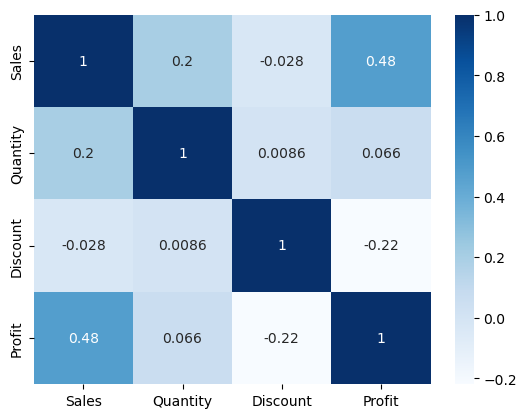

In [9]:
sns.heatmap(store_data.drop("Postal Code",axis=1).corr(),cmap="Blues",annot=True);

Sales and Profit are positively correlated.

Discount and Profit are moderately negatively correlated.

# Understanding our Sales 

###  Sales vs Region

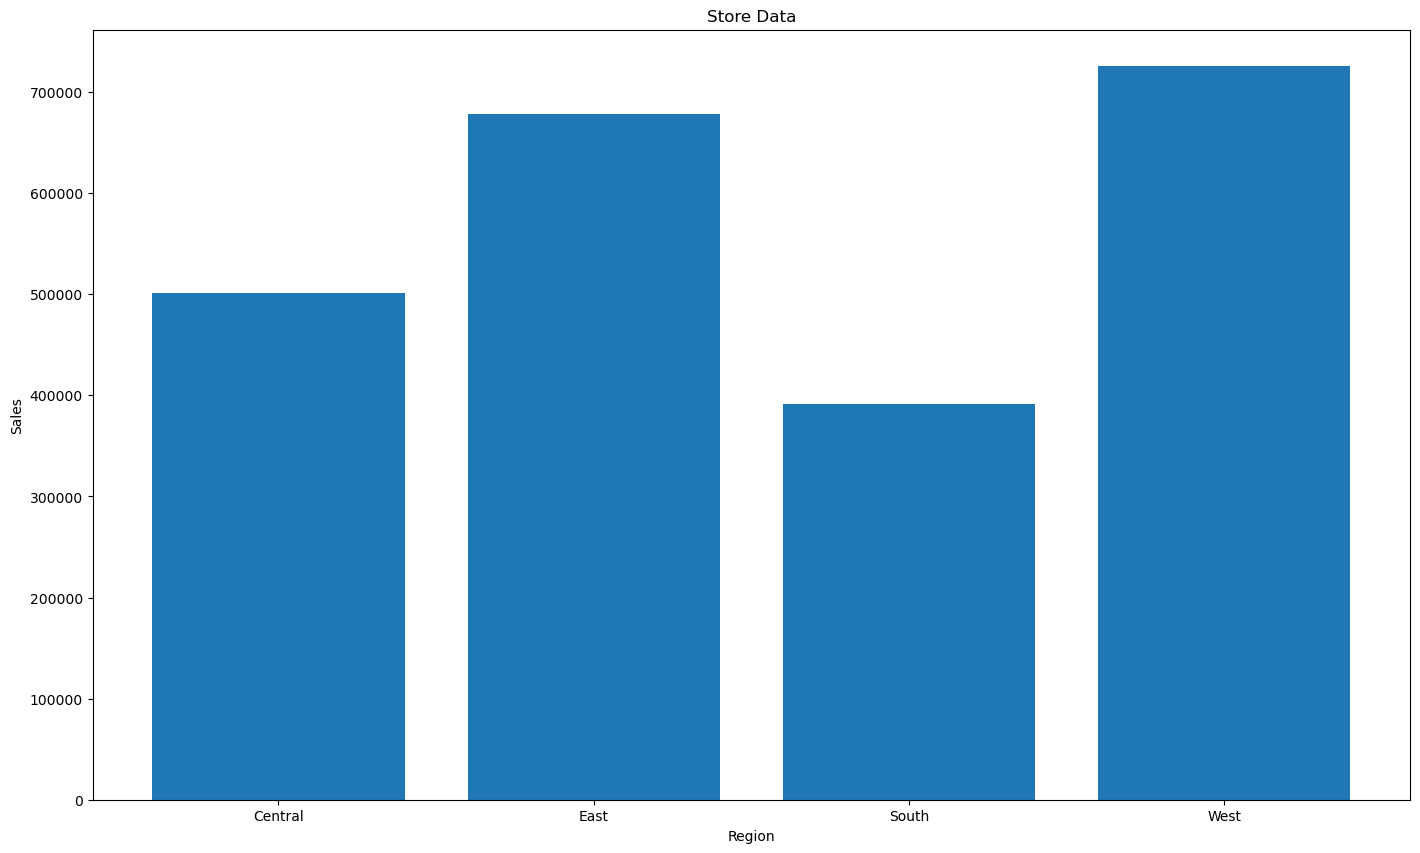

In [10]:
fig, ax = plt.subplots(figsize=(17,10))

ax.bar(store_data.groupby(['Region'])['Sales'].sum().index, store_data.groupby(['Region'])['Sales'].sum().values);

ax.set(xlabel="Region", ylabel="Sales",title="Store Data");


East and West Regions offer more sales as compared to the Central

South has lowest sales 

Now that we know that South region has low sales, we can further try analyse the reason with the available data


In [43]:
store_data.groupby(["Segment"]).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


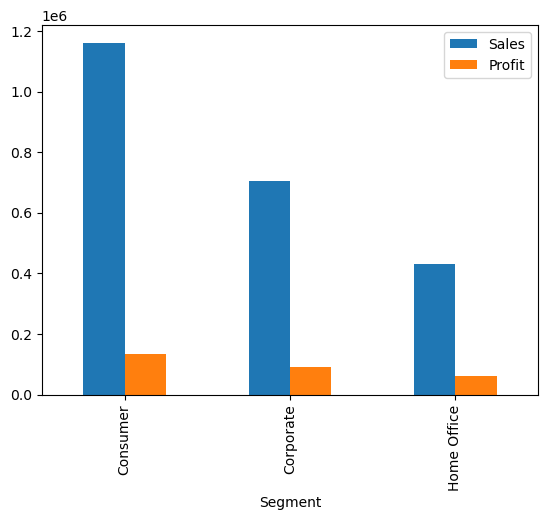

In [45]:
store_data.groupby(["Segment"]).sum().plot.bar(y=["Sales","Profit"]);

We can see nearly half of sales come from Consumer Segment, so the profit earned from this segment is more but compared to the amount of sales, it is less.


So if the Business Manager needs sales for Cash Flow (eg.to pay dues, for investment), discounts can be given in this segment and Sales will boost, Cash Flow will increase, though the profit earned in this segment per sale will be little less compared to other segments


To calculate Average Profit per Sale, (Profit / Sales) ratio can be used

### (Profit / Sales) ratio

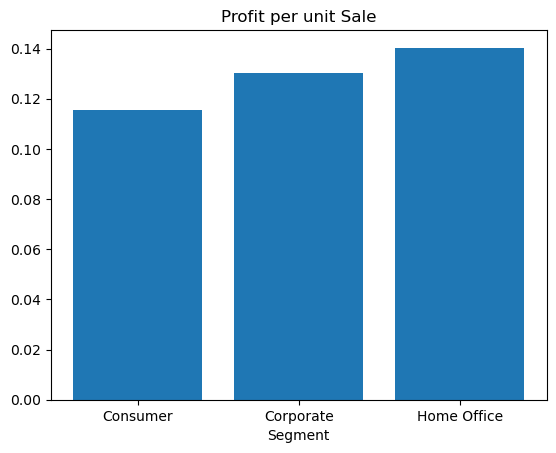

In [55]:

fig, ax = plt.subplots()

ratio = (store_data.groupby(["Segment"])["Profit"].sum())/(store_data.groupby(["Segment"])["Sales"].sum())

ax.bar(store_data["Segment"].unique(), ratio);

ax.set(title = "Profit per unit Sale", xlabel="Segment");

We can see that 'Home Office' segment gives maximum Profit on unit sales.

So running advertisements, offers for 'Home Office' segment can boost sales, and maximum profit will be earned.

Even though this number is not much less for the 'Consumer' Section but this little difference will create a lot of difference for stores where sales are very high.


#### Grouping Sales by Cities

In [11]:
store_data.groupby(['City'])['Sales'].sum()

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

#### Visualizing City wise Distribution of Sales by Pie Chart

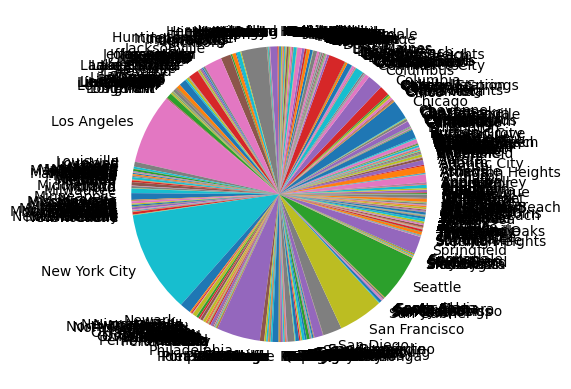

In [12]:
fig, ax = plt.subplots()

ax.pie(store_data.groupby(['City'])['Sales'].sum(), labels=store_data.groupby(['City'])['Sales'].sum().index);

We can see that sales come from a lot of cities 

Los Angeles, New York City, Seattle, San Francisco contribute more to the sales of store as compared to other cities

Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.

In [13]:
store_data.groupby(["Category"])["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

### Sales vs Category

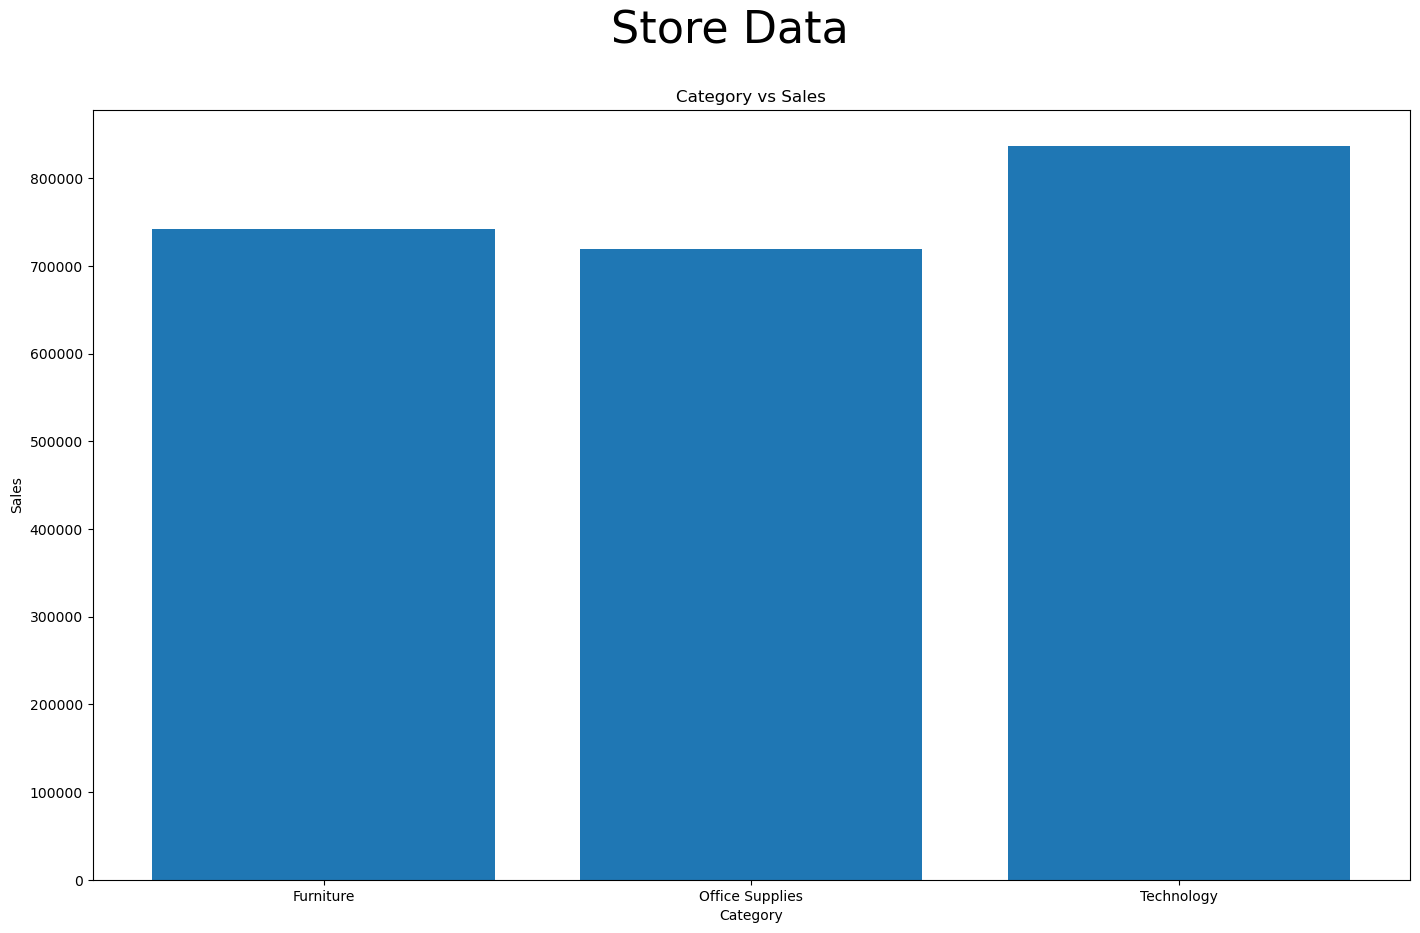

In [14]:
fig, ax = plt.subplots(1,1, figsize=(17,10))

ax.bar(store_data.groupby(["Category"])["Sales"].sum().index, store_data.groupby(["Category"])["Sales"].sum().values);

ax.set(title="Category vs Sales", xlabel="Category", ylabel="Sales");

fig.suptitle("Store Data", fontsize=32);




###  Sales vs Sub-Category

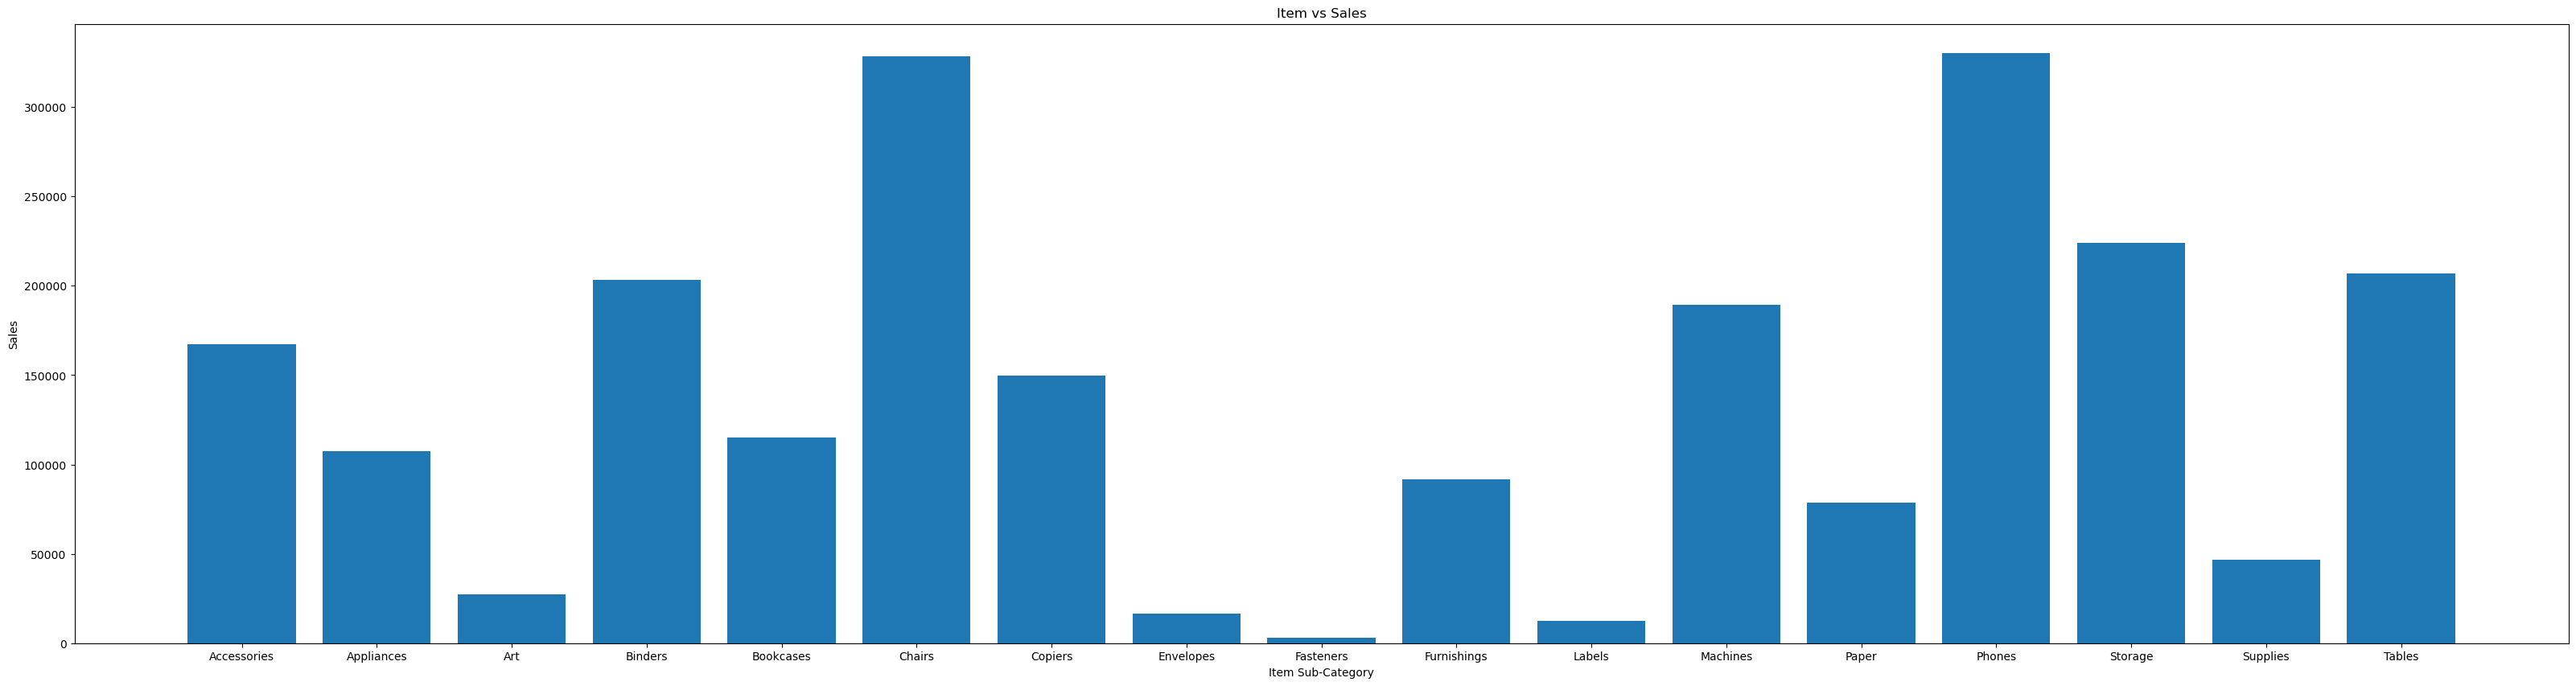

In [15]:
fig, ax = plt.subplots(figsize=(40, 10))

ax.bar(store_data.groupby(["Sub-Category"])["Sales"].sum().index, store_data.groupby(["Sub-Category"])["Sales"].sum().values) 

ax.set(title="Item vs Sales", xlabel="Item Sub-Category", ylabel="Sales");

Fasteners, Labels, Art, Envelopes, Furnishings, Paper and Supplies have low sales, it needs to be improved

As a Business Manager, we have to identify the weak areas of our sales

We are interested in increasing sales and profit

In [16]:
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


We can see that Profit Column has negative entries also (indicates loss)

We can seprate this data and perform analysis on this

In [17]:
loss_data = store_data[store_data["Profit"] < 0]
loss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [18]:
loss_data.shape

(1871, 13)

There are 1871 Sales out of 9944 where loss have happened!!

In [19]:
print(f'The total loss is',loss_data["Profit"].sum());

The total loss is -156131.2857


# Analysing the loss

### Grouping by Segment

In [20]:
loss_data.groupby(["Segment"]).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


More discount leads to more loss

But Giving more discount leads to more sales

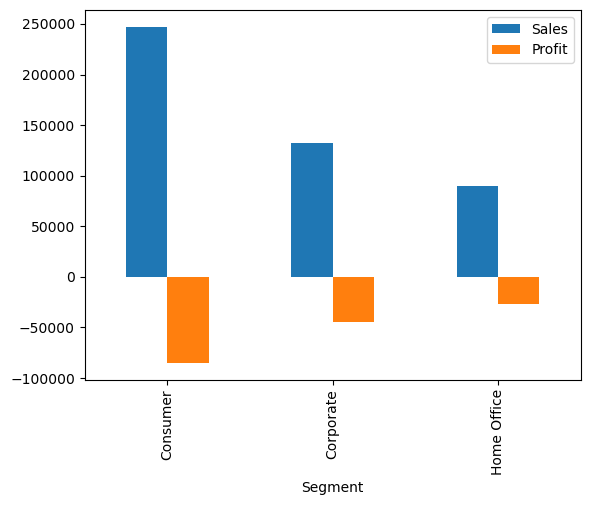

In [21]:
loss_data.groupby(["Segment"]).sum().plot.bar(y=["Sales","Profit"]);

### Grouping by Category

In [22]:
loss_data.groupby(["Category"]).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,42626448,257885.5868,2652,262.14,-60936.1090
Office Supplies,48505006,91608.6750,3425,547.20,-56615.2585
Technology,13627937,119212.8930,963,90.40,-38579.9182


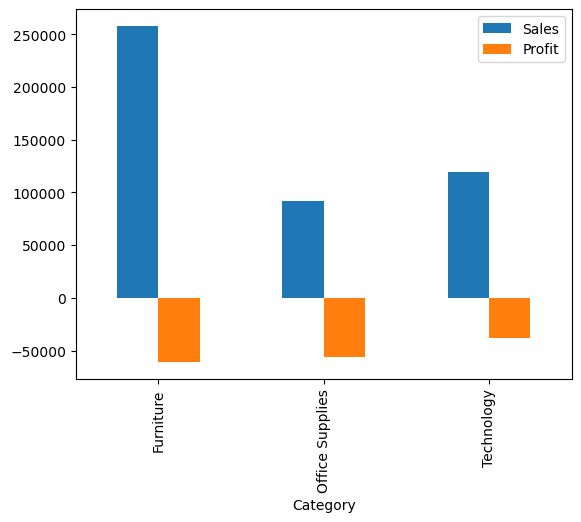

In [23]:
loss_data.groupby(["Category"]).sum().plot.bar(y=["Sales","Profit"]);

Furniture Category suffers from most losses

But It also has much more sales

Loss/Sales ratio is lowest in Furniture Category

So if we increase discount in Furniture Category, Sales will increase

This Furniture Category will provide lowest loss on more sales

### Box Plot for Sales

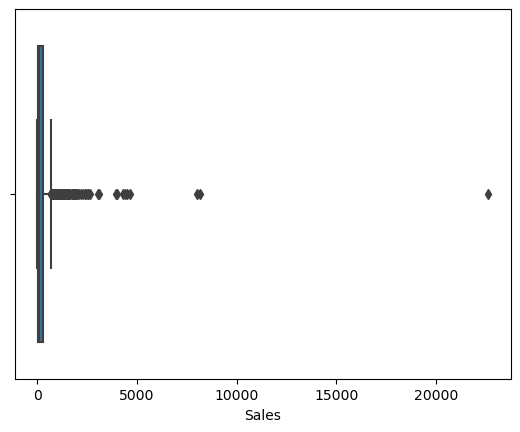

In [37]:
sns.boxplot(x = loss_data["Sales"]);

### Box Plot for Loss

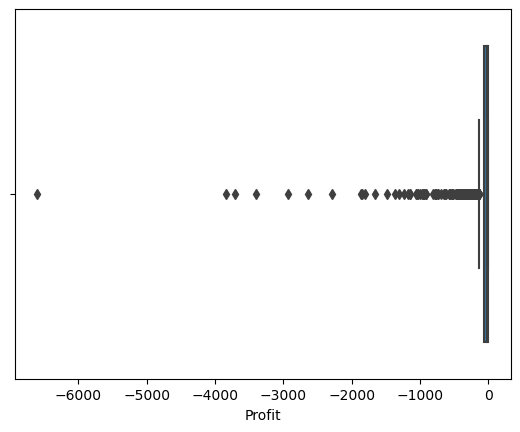

In [39]:
sns.boxplot(x = loss_data["Profit"]);

We can see lot of outliers are present in Sales and Profit data (skewed distibution), so we will use median (instead of mean) for aggregation

In [40]:
loss_data.groupby(["Category"]).median()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,62521.0,241.378,3.0,0.3,-31.8521
Office Supplies,60610.0,13.442,3.0,0.7,-11.7934
Technology,43615.0,110.376,3.0,0.4,-17.9964


On calculating the median, we can see loss in more in the Furniture category

### Grouping by Sub-Category

In [28]:
loss_data.groupby(["Sub-Category"]).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


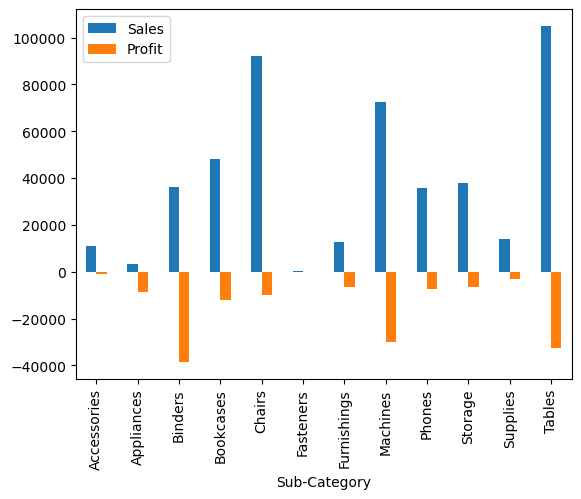

In [29]:
loss_data.groupby(["Sub-Category"]).sum().plot.bar(y=["Sales","Profit"]);

Binders, Machines, Tables categories have more loss compared to other categories

In Binders category, Loss incurred is more than Sales itself.

So if further sales increase in Binders category, it will lead to vast loss.

Loss/Sale Ratio can be calcuated of each category.

Then the category with lowest Loss/Sale Ratio can be chosen and discount can be given in that category.

The discount will boost the sales.

Besides this, anather hypothesis is that if there is less demand of something, then even after increasing discount, the sales will not go much high.

So the categories which provide a trade off between more sales and less loss (more profit) can be chosen, discount can be given (or maybe offers, combos can be given, adds can be run) and sales will boost.

From the above graph, one such category that looks like this is 'Chairs'.

### Grouping by Cities

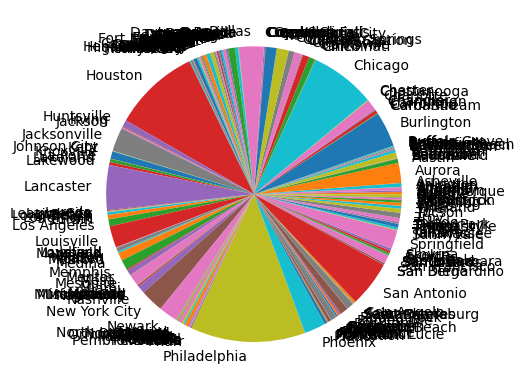

In [30]:
fig, ax = plt.subplots()

ax.pie(loss_data.groupby(["City"])["Profit"].sum()*-1, 
       labels=loss_data.groupby(["City"])["Profit"].sum().index);


In Philadelphia, Houston and Chicago cities, loss is high.

### Grouping by State

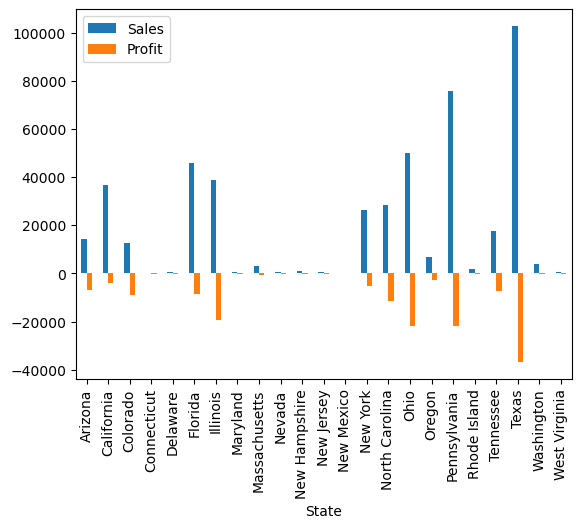

In [31]:
loss_data.groupby(["State"]).sum().plot.bar(y=["Sales","Profit"]);

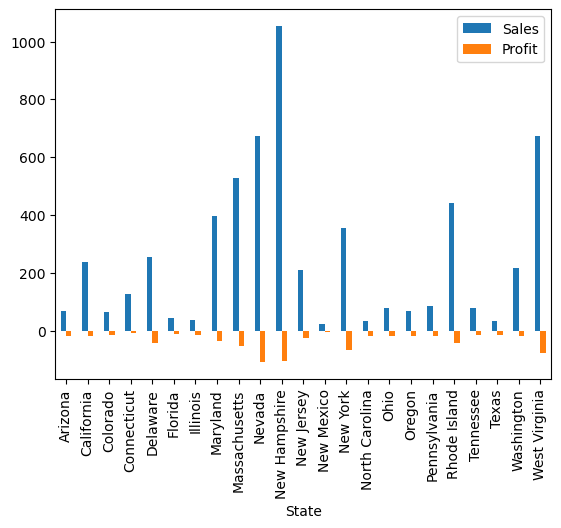

In [34]:
loss_data.groupby(["State"]).median().plot.bar(y=["Sales","Profit"]);

In [35]:
loss_data.groupby(["State"]).sum()["Profit"].nsmallest(10)

State
Texas            -36813.1875
Ohio             -21750.0002
Pennsylvania     -21602.8515
Illinois         -19501.6975
North Carolina   -11557.9854
Colorado          -8900.9048
Florida           -8689.8295
Tennessee         -7257.0174
Arizona           -6656.7675
New York          -5031.1378
Name: Profit, dtype: float64

Above mentioned states have highest losses

Coming back to our original data

In [42]:
store_data.groupby(["State"]).sum()["Sales"].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

Above mentioned state list have lowest sales

#### Overall Sales and Profit vs Ship Mode

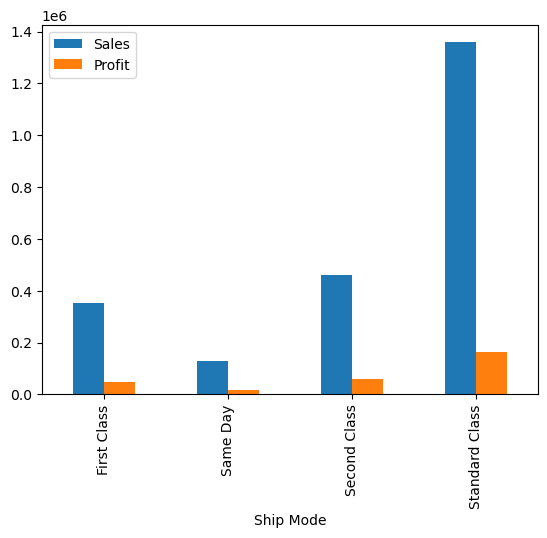

In [61]:
store_data.groupby(["Ship Mode"]).sum().plot.bar(y=["Sales","Profit"]);

We can see most customers chose Standard Class shipping for their products, which indicates that they don't need goods on urgent basis.

This information can be used to arrange the inventory, production of goods accordingly.

#### A Single Sale and Profit (aggregated) vs Ship Mode

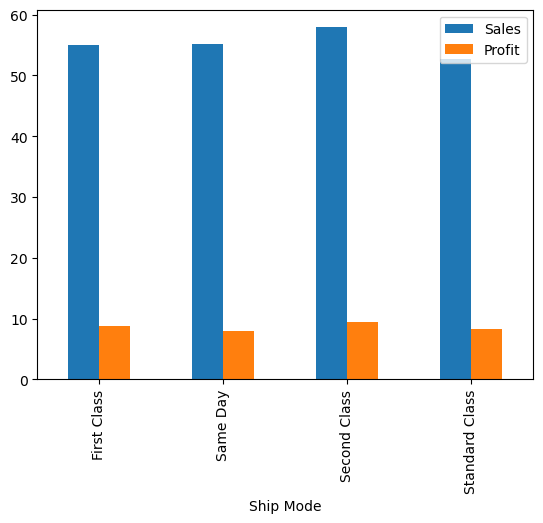

In [63]:
store_data.groupby(["Ship Mode"]).median().plot.bar(y=["Sales","Profit"]);

This is a surprising observation that customers ordering with First Class shipping mode don't have high order value.

Instead the order values of all segments look nearly the same.